In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# plt.style.use('classic')

In [2]:
base = "https://raw.githubusercontent.com/pathstream-curriculum/Python/master/"
retail_features = "retail_features_4stores.csv"
retail_sales = "retail_sales_4stores.csv"

In [3]:
retail_sales_df = pd.read_csv(base + retail_sales)
retail_features_df = pd.read_csv(base + retail_features)

In [4]:
retail_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 8 columns):
Unnamed: 0      728 non-null int64
Store           728 non-null object
Date            728 non-null object
Temperature     728 non-null float64
Fuel_Price      728 non-null float64
CPI             676 non-null float64
Unemployment    676 non-null float64
IsHoliday       728 non-null bool
dtypes: bool(1), float64(4), int64(1), object(2)
memory usage: 40.6+ KB


In [5]:
#

In [6]:
# convert Date to datetime
retail_sales_df["Date"] = pd.to_datetime(retail_sales_df.Date)
retail_features_df["Date"] = pd.to_datetime(retail_sales_df.Date)


#deal with the sorting issue up front
retail_sales_df.sort_values("Date", inplace=True)
retail_features_df.sort_values("Date", inplace=True)

In [7]:
retail_sales_df

,Unnamed: 0,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1178,Los Angeles,Clothing,2010-01-10,27023.35,False
31,2751,Buffalo,Jewelry,2010-01-10,6947.26,False
30,1464,Los Angeles,Furniture,2010-01-10,12390.87,False
29,3609,Seattle,Housewares,2010-01-10,88537.23,False
28,463,Las Vegas,Jewelry,2010-01-10,34912.45,False
...,...,...,...,...,...,...
4545,569,Las Vegas,Jewelry,2012-12-10,35446.18,False
4544,855,Las Vegas,Outdoor,2012-12-10,3788.59,False
4574,2857,Buffalo,Jewelry,2012-12-10,9072.09,False
4558,3715,Seattle,Housewares,2012-12-10,91054.12,False


In [8]:
# Goal for this section is to make the multi-department plot more pretty. 

In [9]:
# break down into individual depts
def get_dept(sales_df, dept, store):
    store_and_dept = sales_df.loc[sales_df["Store"]==store].loc[sales_df["Dept"]==dept]
    store_and_dept_sorted = store_and_dept.sort_values("Date")
    return store_and_dept_sorted

In [10]:
depts = ["Housewares", "Shoes", "Outdoor", "Jewelry"]

s1d1 = get_dept(retail_sales_df, depts[0], "Los Angeles")
s1d2 = get_dept(retail_sales_df, depts[1], "Los Angeles")
s1d3 = get_dept(retail_sales_df, depts[2], "Los Angeles")
s1d4 = get_dept(retail_sales_df, depts[3], "Los Angeles")

/Users/caldermyers/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


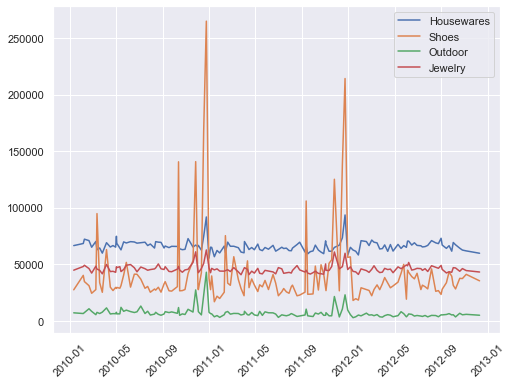

In [11]:
# needs titles + axis labels. 
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(s1d1["Date"], s1d1["Weekly_Sales"], label=depts[0])
ax.plot(s1d2["Date"], s1d2["Weekly_Sales"], label=depts[1])
ax.plot(s1d3["Date"], s1d3["Weekly_Sales"], label=depts[2])
ax.plot(s1d4["Date"], s1d4["Weekly_Sales"], label=depts[3])

plt.xticks(rotation=45)
plt.legend()

In [12]:
housewares_df = retail_sales_df.loc[retail_sales_df["Dept"] == "Housewares"]

(array([733773., 733893., 734016., 734138., 734258., 734381., 734503.,
        734624., 734747., 734869.]), <a list of 10 Text xticklabel objects>)

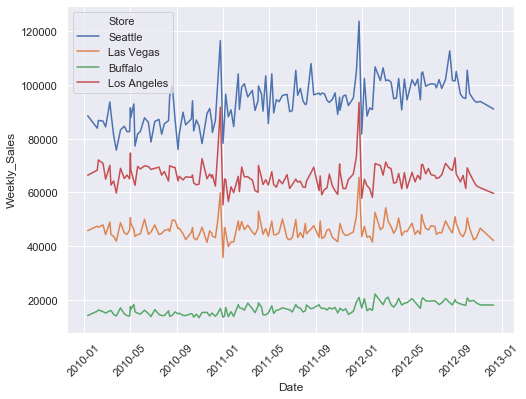

In [13]:
# line plot using seaborn to unpack categories
plt.figure(figsize=(8,6))
sns.lineplot(x="Date", y="Weekly_Sales", hue="Store", data=housewares_df)
plt.xticks(rotation=45)

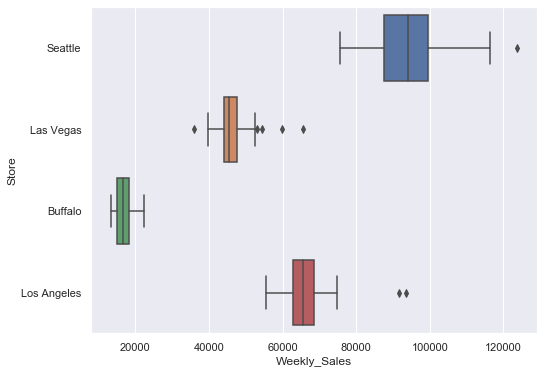

In [14]:
# boxplot
plt.figure(figsize=(8,6))
sns.boxplot(x="Weekly_Sales", y="Store", data=housewares_df)

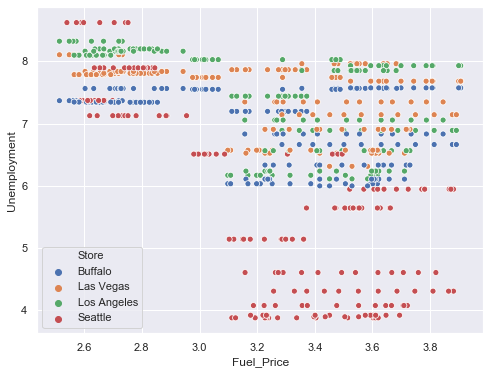

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="Fuel_Price", y="Unemployment", hue="Store", data=retail_features_df)

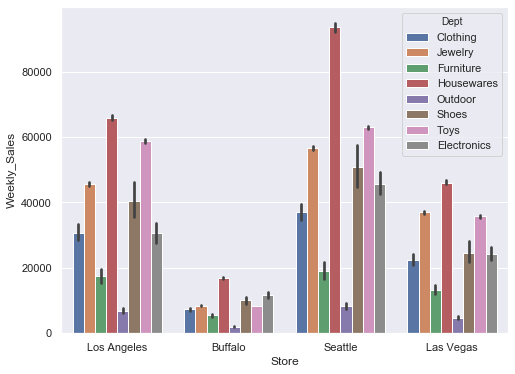

In [16]:
#barplot -- this is a little weird bc it's showing the average for each of these categories (the black line
# is a confidence interval--seaborn is 95% sure the true average lies in that range)
plt.figure(figsize=(8,6))
sns.barplot(x="Store", y="Weekly_Sales", hue="Dept", data=retail_sales_df)

In [17]:
#let's make a Los Angeles only df
la_df = retail_sales_df.loc[retail_sales_df["Store"] == "Los Angeles"]

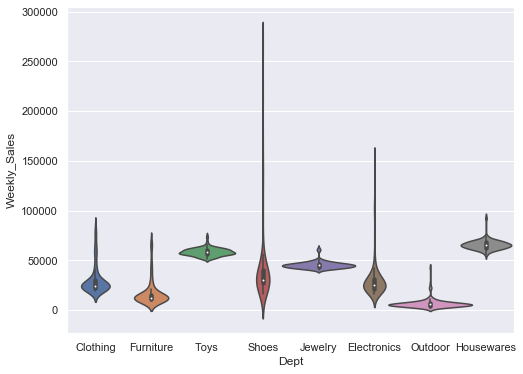

In [18]:
#violinplot
plt.figure(figsize=(8,6))
sns.violinplot(x="Dept", y="Weekly_Sales", data=la_df, width=1.5)

In [19]:
la_and_sea_df = retail_sales_df.loc[retail_sales_df["Store"].isin(["Los Angeles", "Seattle"])]

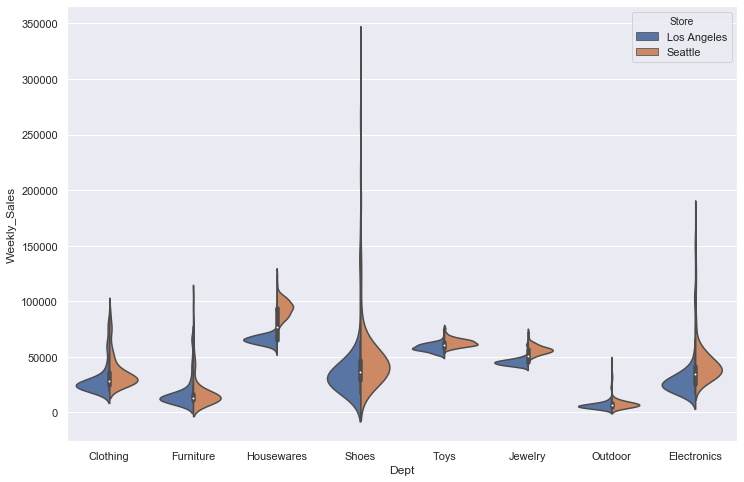

In [20]:
plt.figure(figsize=(12,8))
sns.violinplot(x="Dept", y="Weekly_Sales", hue="Store", data=la_and_sea_df, split=True)

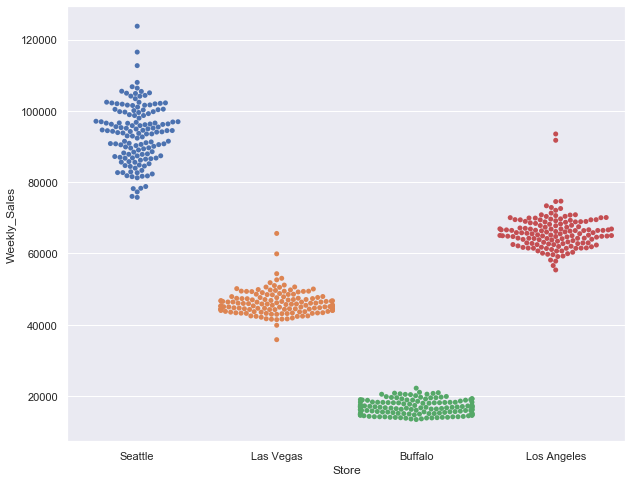

In [21]:
# swarmplot
plt.figure(figsize=(10,8))
sns.swarmplot(x="Store", y="Weekly_Sales", data=housewares_df)

KeyboardInterrupt: 

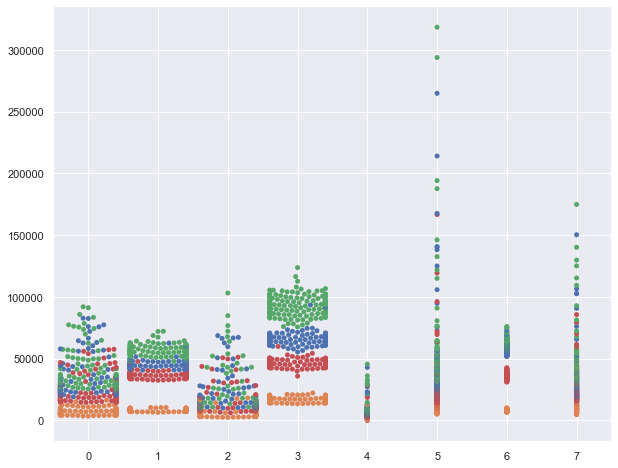

In [22]:
#this one and the next one look pretty cool and do tell a story but they are also prob too busy for our purposes 
plt.figure(figsize=(10,8))
sns.swarmplot(x="Dept", y="Weekly_Sales", hue="Store", data=retail_sales_df)

In [ ]:
plt.figure(figsize=(10,8))
sns.swarmplot(x="Store", y="Weekly_Sales", hue="Dept", data=retail_sales_df)

In [ ]:
# pairplots
# we shouldn't have had to specify only the numeric columns but I was getting a weird error that has something 
# to do with the IsHoliday column...or possibly to do with the combo of IsHoliday and missing values in other
# columns. We should be able to do just sns.pairplot(retail_features_df) and it'll be smart enough to figure out
# what to plot  ¯\_(ツ)_/¯

sns.pairplot(retail_features_df[["Temperature", "Fuel_Price", "CPI", "Unemployment"]])

In [ ]:
# extra weirdly, it works right when I specify hue
# and of course here is the damn unnamed column again grrr
sns.pairplot(retail_features_df, hue="Store")

In [ ]:
housewares_with_features_df = housewares_df[["Store", 
                                             "Date", 
                                             "Weekly_Sales"]].merge(retail_features_df[["Store",
                                                                                          "Date",
                                                                                          "Temperature", 
                                                                                          "Fuel_Price", 
                                                                                          "CPI", 
                                                                                          "Unemployment"]],
                                                                                          on=("Store","Date"))

In [ ]:
housewares_with_features_df.info()

In [ ]:
sns.pairplot(housewares_with_features_df)

In [ ]:
sns.pairplot(housewares_with_features_df, hue="Store")

In [23]:
sea_df = pd.read_csv('seattle_housing_project_data.csv')

In [38]:
sea_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 22 columns):
id               791 non-null int64
date             791 non-null object
price            791 non-null float64
bedrooms         791 non-null int64
bathrooms        791 non-null float64
sqft_living      791 non-null int64
sqft_lot         791 non-null int64
floors           791 non-null float64
waterfront       791 non-null int64
view             791 non-null int64
condition        791 non-null int64
grade            791 non-null int64
sqft_above       791 non-null int64
sqft_basement    791 non-null int64
yr_built         791 non-null int64
yr_renovated     791 non-null int64
zipcode          791 non-null object
lat              791 non-null float64
long             791 non-null float64
sqft_living15    791 non-null int64
sqft_lot15       791 non-null int64
age              791 non-null int64
dtypes: float64(5), int64(15), object(2)
memory usage: 136.1+ KB


In [25]:
sea_df.zipcode.unique()

array([98126, 98070, 98168, 98039])

In [39]:
sea_df["zipcode"] = sea_df["zipcode"].astype('str')

In [40]:
cols = ["zipcode", "price", "sqft_living", "sqft_lot", "yr_built"]







In [41]:
sea_df_filtered = sea_df[cols]

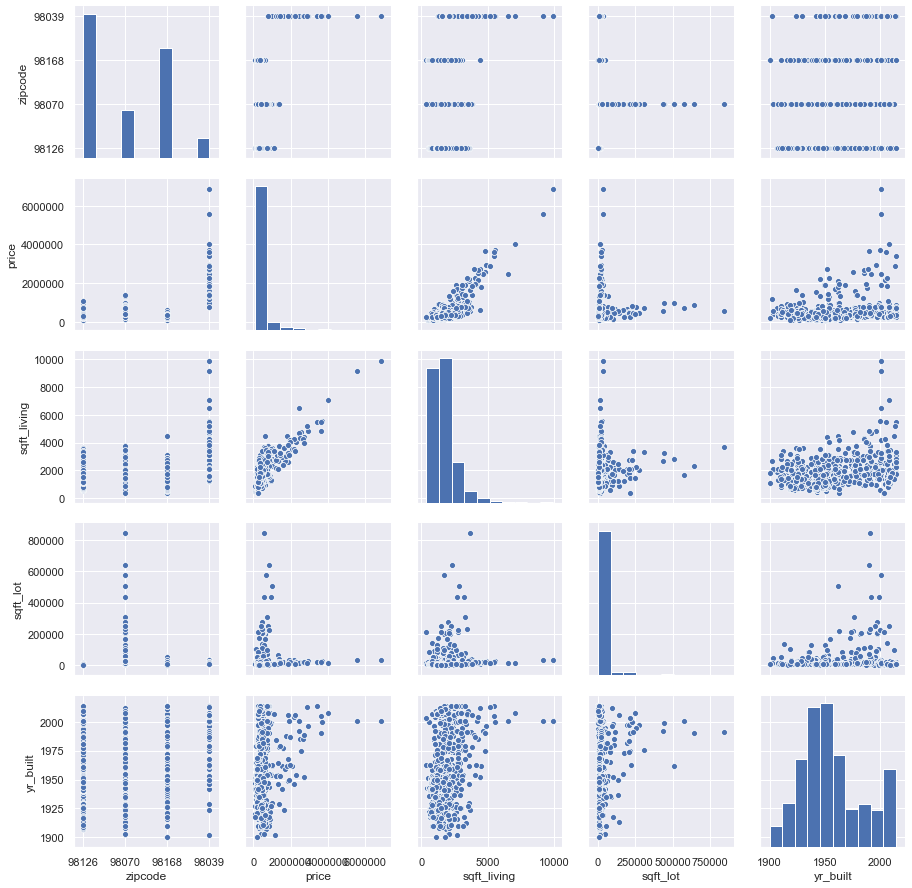

In [42]:
sns.pairplot(sea_df_filtered)

/Users/caldermyers/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/caldermyers/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


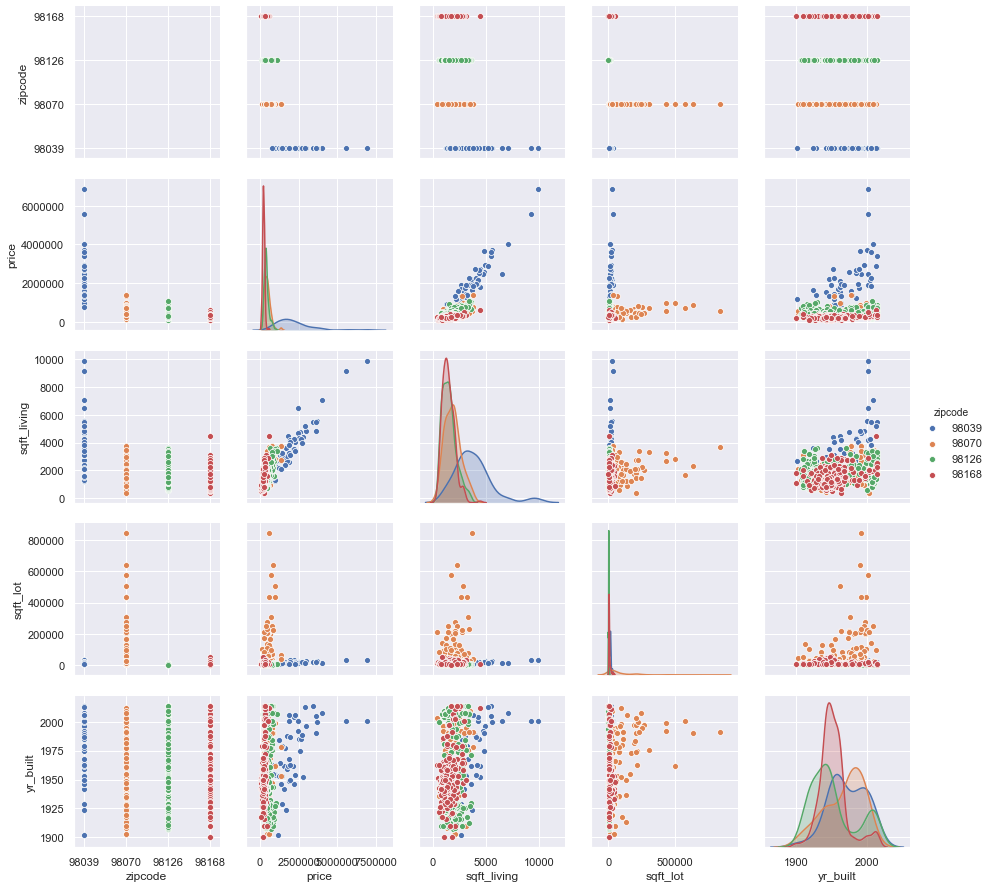

In [43]:
sns.pairplot(sea_df_filtered, hue="zipcode")